In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

import os
import sys

%matplotlib widget

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools







In [2]:
data = pd.read_csv("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/oscillo/L128Z201.csv")

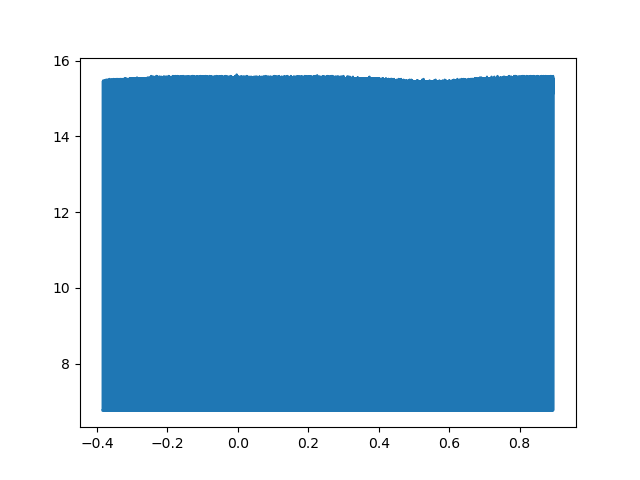

In [3]:
time = np.asarray(data.iloc[:,0])
signal = np.asarray(data.iloc[:,1])

plt.figure()
plt.plot(np.asarray(data.iloc[:,0]),np.asarray(data.iloc[:,1]))
plt.show()

In [4]:
importlib.reload(tools)

def moving_average(signal, window_size):
    cumsum = np.cumsum(signal, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

time_window = 10 # in milliseconds

window_size = int((time_window/1000)/(time[1]-time[0]))

signal_filtered = moving_average(signal, window_size)
time_filtered = moving_average(time, window_size)
time_filtered = time_filtered - time_filtered[0]


F, A, P = tools.FFT(time_filtered, signal_filtered)

popt, xfit, yfit = tools.sinus_fit(time_filtered, signal_filtered, time_filtered[0], time_filtered[-1], len(time_filtered), p0 = [ 2.6,  1,  0.8, 11])



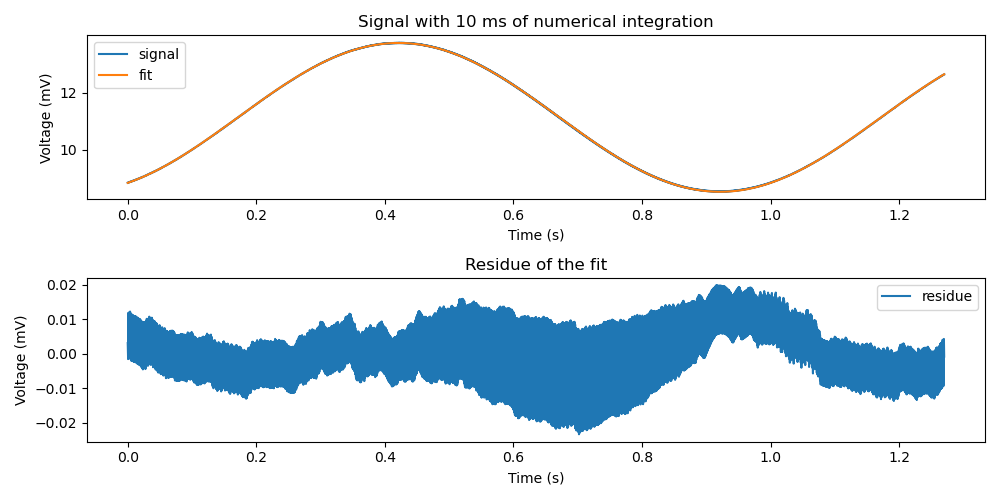

In [8]:
residue = signal_filtered - yfit

figure, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(time_filtered, signal_filtered, label='signal')
ax[0].plot(xfit, yfit, label='fit')
ax[1].plot(time_filtered, residue, label='residue')

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (mV)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Voltage (mV)')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Signal with 10 ms of numerical integration')
ax[1].set_title('Residue of the fit')


figure.tight_layout()


In [9]:
popt

array([ 2.59761314,  0.99975676,  0.82863817, 11.13288808])